<a href="https://colab.research.google.com/github/JPineiro13/interacting-with-api-python-project-tutorial/blob/main/4geeks_interacting_with_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Las tres pistas principales son:
   duration_ms                              name  popularity
7     7.190883               Hey Jude - 2015 Mix          66
9     3.038217       Something - Remastered 2009          72
8     2.494883  And I Love Her - Remastered 2009          73
  
Todas las pistas son:
   duration_ms                                  name  popularity
7     7.190883                   Hey Jude - 2015 Mix          66
9     3.038217           Something - Remastered 2009          72
8     2.494883      And I Love Her - Remastered 2009          73
6     4.332433       Come Together - Remastered 2009          75
2     2.094433           Yesterday - Remastered 2009          76
3     2.438883          In My Life - Remastered 2009          76
4     2.306433           Blackbird - Remastered 2009          76
5     2.587100     Twist And Shout - Remastered 2009          76
1     4.050433           Let It Be - Remastered 2009          77
0     3.095550  Here Comes The Sun - Remastered 

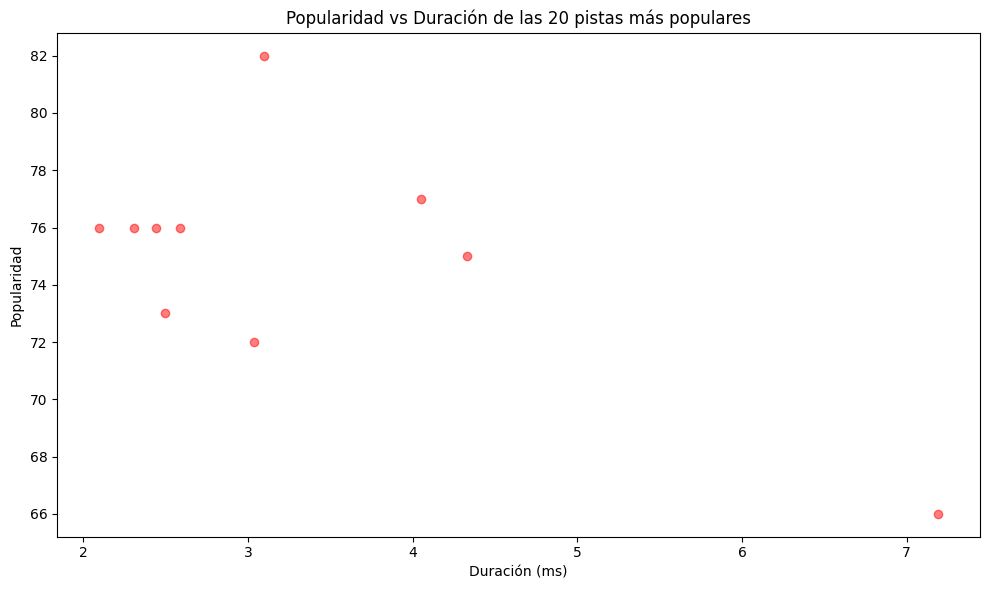

Podemos observar que no hay una correlación entre la longitud de una canción de los Beatles y su popularidad


In [2]:
#He añadido lo de os.system para poder instalar spotipy en el entorno de collab.
#Hay un par de líneas comentadas más adelante porque también lo he estado probando en local
import os
os.system("pip install spotipy");
import pandas as pd
#from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

#load_dotenv()

#El .env ha sido creado en local con estos datos:
#CLIENT_ID="3622e33b8acb42a282c1497355897099"
#CLIENT_SECRET="5f6b1f8749cb4d31896a5f52774b20da"


# Me conecto a spotify con los valores que tengo en el .env
#client_id = os.environ.get('CLIENT_ID')
#client_secret = os.environ.get('CLIENT_SECRET')


client_id = '3622e33b8acb42a282c1497355897099'
client_secret = '5f6b1f8749cb4d31896a5f52774b20da'

sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))


# Selecciono el artista que quiero, le pido sus top tracks y los guardo en response
# Al principio le metí el id de Mozart. El problema con los autores clásicos es que no hay
# grabaciones de ellos mismos como artistas, sino interpretaciones de sus obras por otros músicos.
# Esto hace que las "obras más escuchadas" no sean en realidad las más populares
# Por ejemplo, si un pianista muy conocido decide tocar una de sus piezas de piano, esto tendrá un
# impacto muy grande en qué obras figuran como más poupulares de ese autor.
# Esto no pasa con Los Beatles, donde lógicamente lo más escuchado son las interpretaciones
# de los propios Beatles y no se ven eclipsado por las versiones de otros artistas
artist_id = "3WrFJ7ztbogyGnTHbHJFl2" #El de los Beatles

#Este es el de Mozart: "4NJhFmfw43RLBLjQvxDuRS" Lady Gaga "1HY2Jd0NmPuamShAr6KMms"

response = sp.artist_top_tracks(artist_id)
if response:
#Si devuelve las pistas las guardo en tracks
  tracks = response["tracks"]
else:
	print("No se han podido obtener top tracks")

tracks_todas = tracks
# Hago una sublista de todas las pistas con las tres primeras
tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

# Ahora creo el dataframe de la sublista de las tres primeras, y la lista con las 20 primeras
tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)
print("Las tres pistas principales son:")
print(tracks_df.head(3))

# Aquí están las 20 primersa sin tratar
tracks_todas_df = pd.DataFrame.from_records(tracks)
tracks_todas_df.sort_values(["popularity"], inplace = True)
print("  ")
print("Todas las pistas son:")
print(tracks_todas_df.head(20))

#Ahora genero el scatterplot
all_tracks = tracks_todas_df.head(20)
plt.figure(figsize=(10, 6))
plt.scatter(all_tracks["duration_ms"], all_tracks["popularity"], color='red', alpha=0.5)
plt.xlabel('Duración (ms)')
plt.ylabel('Popularidad')
plt.title('Popularidad vs Duración de las 20 pistas más populares')
plt.tight_layout()

# Muestra el gráfico
plt.show()

print("Podemos observar que no hay una correlación entre la longitud de una canción de los Beatles y su popularidad")



In [ ]:

# El anterior generaba esta salida en local:
#jesu@MacBook-Pro src % python3 app.py
#Las tres pistas principales son:
   #duration_ms                                               name  popularity
#9     6.576000  Mozart: Clarinet Concerto in A Major, K. 622: ...          50
#4     5.332883                Mozart: Fantasia in D Minor, K. 397          53
#1     4.861100  Piano Sonata No. 16 in C Major, K. 545 "Sonata...          56

#Todas las pistas son:
#   duration_ms                                               name  popularity
#9     6.576000  Mozart: Clarinet Concerto in A Major, K. 622: ...          50
#4     5.332883                Mozart: Fantasia in D Minor, K. 397          53
#1     4.861100  Piano Sonata No. 16 in C Major, K. 545 "Sonata...          56
#8     2.827767                         Requiem, K. 626: Lacrimosa          58
#6     7.667100  Symphony No. 25 in G Minor, K. 183: I. Allegro...          59
#7     8.622667                          Adagio in E Major, K. 261          59
#0     3.330667  Requiem in D Minor, K. 626: Sequence: VI. Lacr...          60
#3     5.500000  Serenade in B-Flat Major, K. 361 "Gran Partita...          60
#5     3.250000  Ave verum corpus, K.618 (Arr. for Piano by Fra...          60
#2     7.227767  Piano Concerto No. 21 in C Major, K. 467: II. ...          63

# Lo cual no es reflejo de las obras más populares de Mozart

Las tres pistas principales son:
                                               album  \
7  {'album_type': 'album', 'artists': [{'external...   
9  {'album_type': 'album', 'artists': [{'external...   
8  {'album_type': 'album', 'artists': [{'external...   

                                             artists  \
7  [{'external_urls': {'spotify': 'https://open.s...   
9  [{'external_urls': {'spotify': 'https://open.s...   
8  [{'external_urls': {'spotify': 'https://open.s...   

                                   available_markets  disc_number  \
7  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...            1   
9  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...            1   
8  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...            1   

   duration_ms  explicit              external_ids  \
7       431453     False  {'isrc': 'GBUM71505902'}   
9       182293     False  {'isrc': 'GBAYE0601691'}   
8       149693     False  {'isrc': 'GBAYE0601442'}   

                       

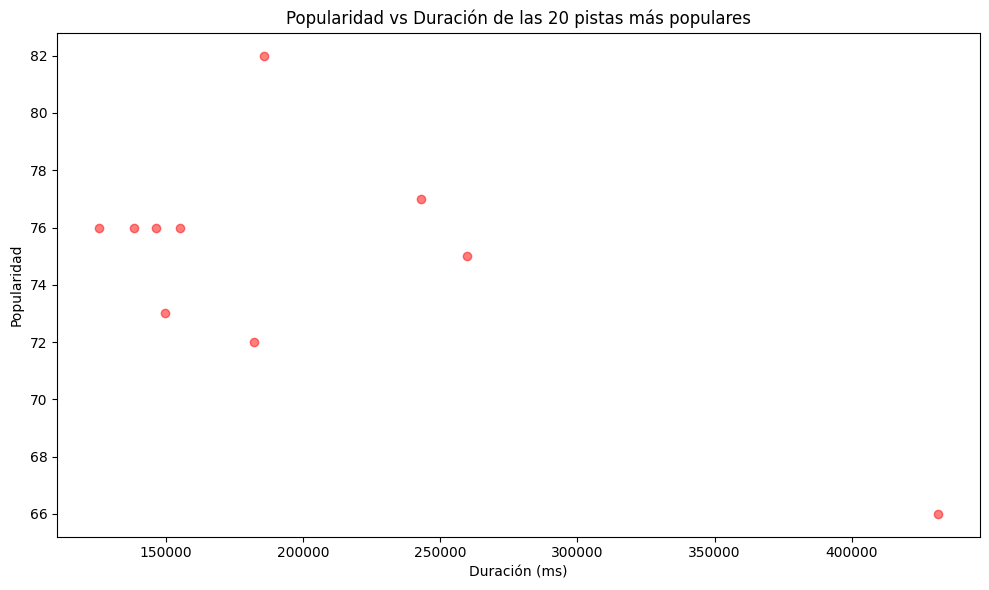

Podemos observar que no hay una correlación entre la longitud de una canción de los Beatles y su popularidad


In [2]:
#Esta es una segunda versión en la que trato de reescribir la función de tracks
# Por lo demás es igual


#He añadido lo de os.system para poder instalar spotipy en el entorno de collab.
#Hay un par de líneas comentadas más adelante porque también lo he estado probando en local
import os
os.system("pip install spotipy");
import pandas as pd
#from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

#load_dotenv()

#El .env ha sido creado en local con estos datos:
#CLIENT_ID="3622e33b8acb42a282c1497355897099"
#CLIENT_SECRET="5f6b1f8749cb4d31896a5f52774b20da"


# Me conecto a spotify con los valores que tengo en el .env
#client_id = os.environ.get('CLIENT_ID')
#client_secret = os.environ.get('CLIENT_SECRET')


client_id = '3622e33b8acb42a282c1497355897099'
client_secret = '5f6b1f8749cb4d31896a5f52774b20da'

sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))


# Selecciono el artista que quiero, le pido sus top tracks y los guardo en response
# Al principio le metí el id de Mozart. El problema con los autores clásicos es que no hay
# grabaciones de ellos mismos como artistas, sino interpretaciones de sus obras por otros músicos.
# Esto hace que las "obras más escuchadas" no sean en realidad las más populares
# Por ejemplo, si un pianista muy conocido decide tocar una de sus piezas de piano, esto tendrá un
# impacto muy grande en qué obras figuran como más poupulares de ese autor.
# Esto no pasa con Los Beatles, donde lógicamente lo más escuchado son las interpretaciones
# de los propios Beatles y no se ven eclipsado por las versiones de otros artistas
artist_id = "3WrFJ7ztbogyGnTHbHJFl2" #El de los Beatles

#Este es el de Mozart: "4NJhFmfw43RLBLjQvxDuRS" Lady Gaga "1HY2Jd0NmPuamShAr6KMms"

response = sp.artist_top_tracks(artist_id)
if response:
#Si devuelve las pistas las guardo en tracks
  tracks = response["tracks"]
else:
	print("No se han podido obtener top tracks")

tracks_todas = tracks

processed_tracks = []

for track in tracks:
    processed_track = {
        "Nombre": track["name"],
        "Popularidad": track["popularity"],
        "Duración": (track["duration_ms"] / (1000 * 60))  # Duración en mins
    }
    processed_tracks.append(processed_track)

# Ahora creo el dataframe de la sublista de las tres primeras, y la lista con las 20 primeras
tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)
print("Las tres pistas principales son:")
print(tracks_df.head(3))

# Aquí están las 20 primersa sin tratar
tracks_todas_df = pd.DataFrame.from_records(tracks)
tracks_todas_df.sort_values(["popularity"], inplace = True)
print("  ")
print("Todas las pistas son:")
print(tracks_todas_df.head(20))

#Ahora genero el scatterplot
all_tracks = tracks_todas_df.head(20)
plt.figure(figsize=(10, 6))
plt.scatter(all_tracks["duration_ms"], all_tracks["popularity"], color='red', alpha=0.5)
plt.xlabel('Duración (ms)')
plt.ylabel('Popularidad')
plt.title('Popularidad vs Duración de las 20 pistas más populares')
plt.tight_layout()

# Muestra el gráfico
plt.show()

print("Podemos observar que no hay una correlación entre la longitud de una canción de los Beatles y su popularidad")